# IMPORTS

In [1]:
from make_plots import plot_activity,create_corr_matrix,cluster3D,cluster2D
from data_pre import create_dataframe,rolling_means,normal_data_Standard,normal_data_MinMax,window_data,get_balanced_dataset

/home/lefteris/Ceid/data_mining/data_pre.py:103: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 4:


# Create DataFrame

In [2]:
data=create_dataframe()
data=data.drop(columns=['index','Unnamed: 0'])
#print(data)

## Plot the number of data for each class

<Axes: title={'center': 'Training examples by activity type'}, xlabel='label'>

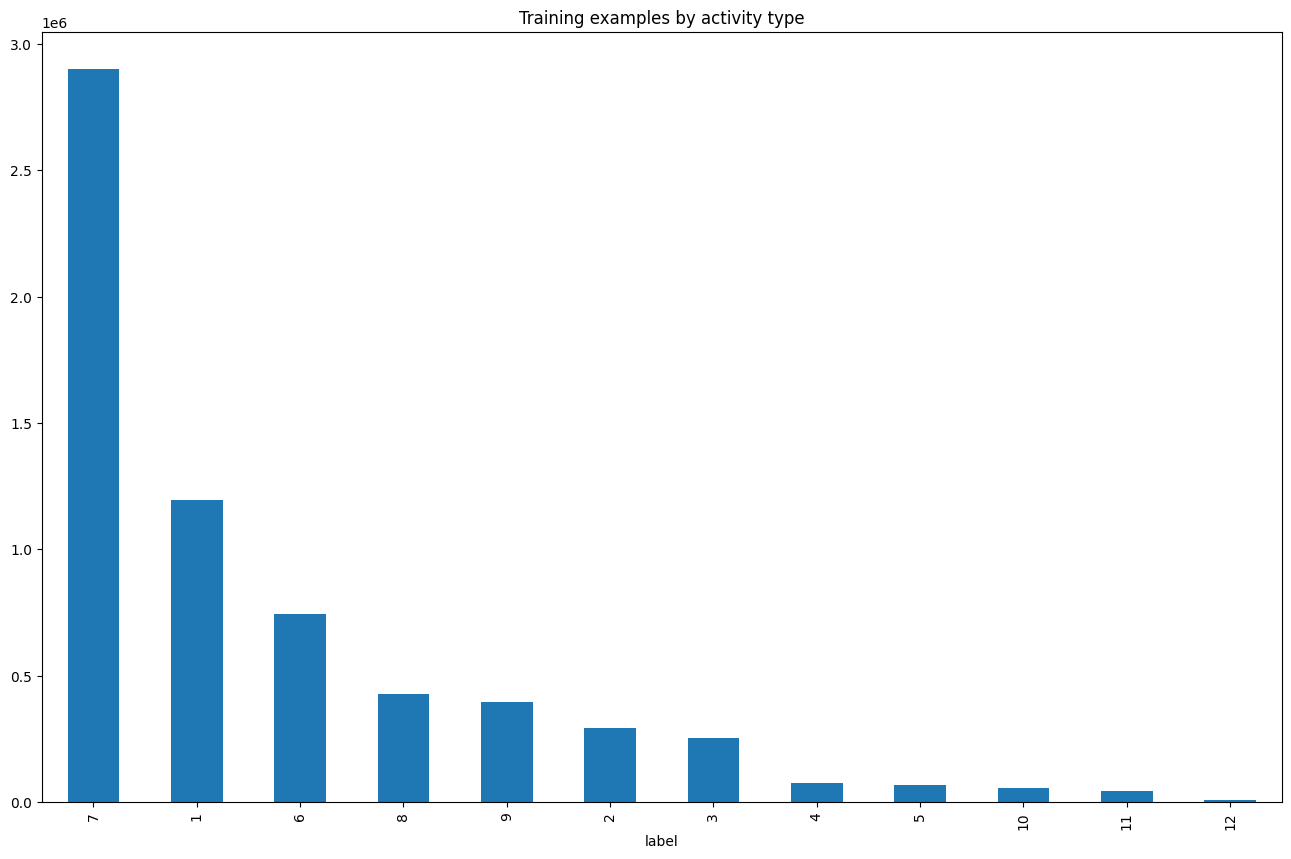

In [3]:
countofActivity=data['label'].value_counts()
countofActivity.plot(kind='bar', title='Training examples by activity type',figsize=(16,10))

## Use Rolling Means to remove outliers

In [4]:
smoothed_df=rolling_means(data,10)

## Let's see how each class looks like

### Walking

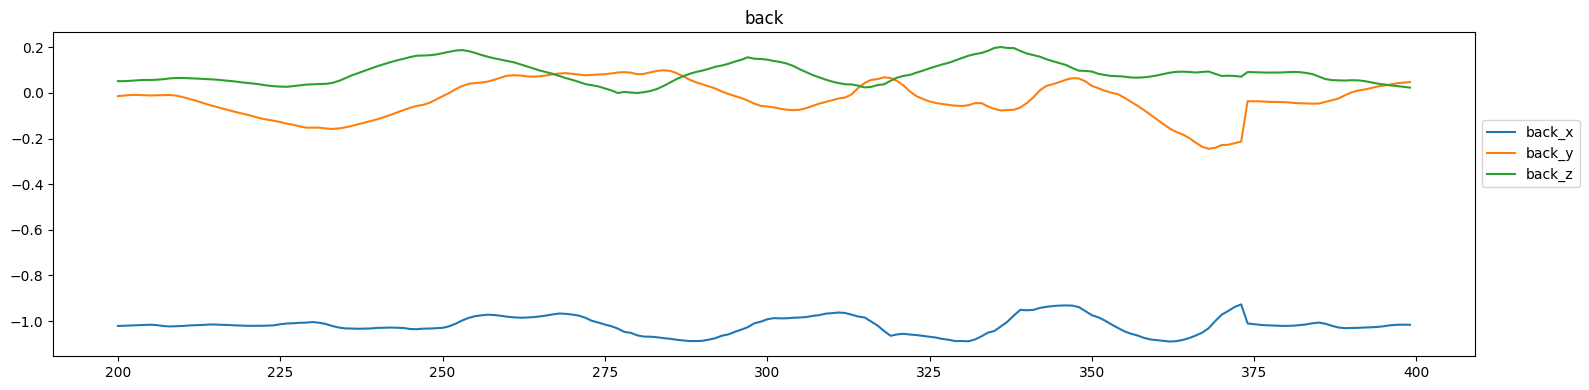

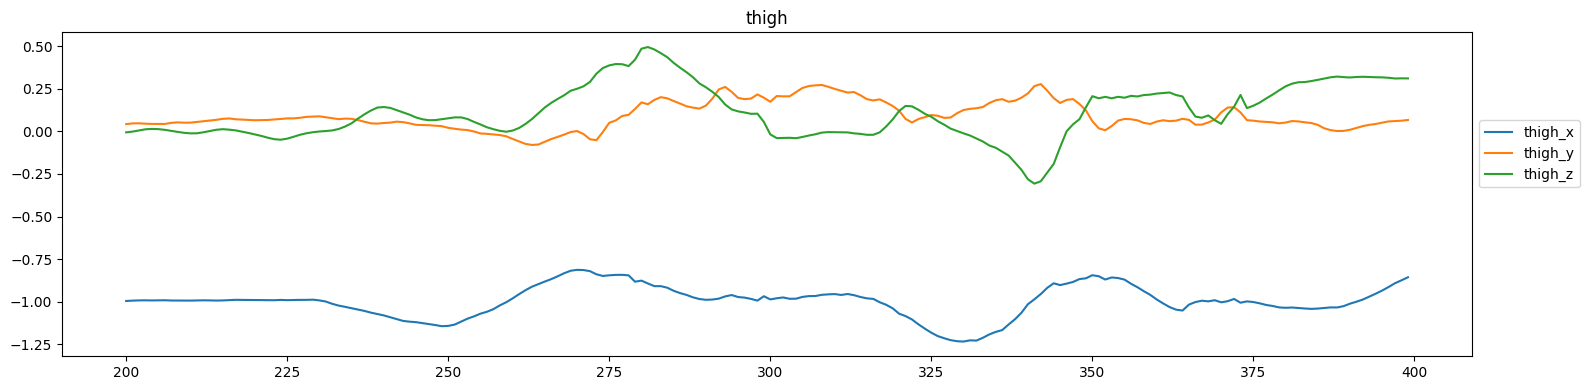

In [5]:
plot_activity(1,smoothed_df,200)

### Running

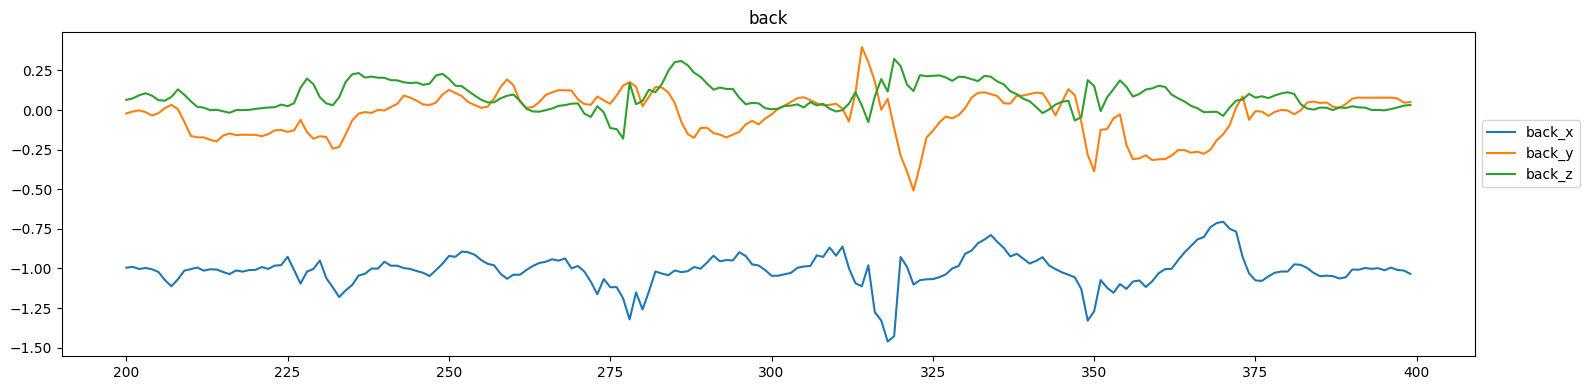

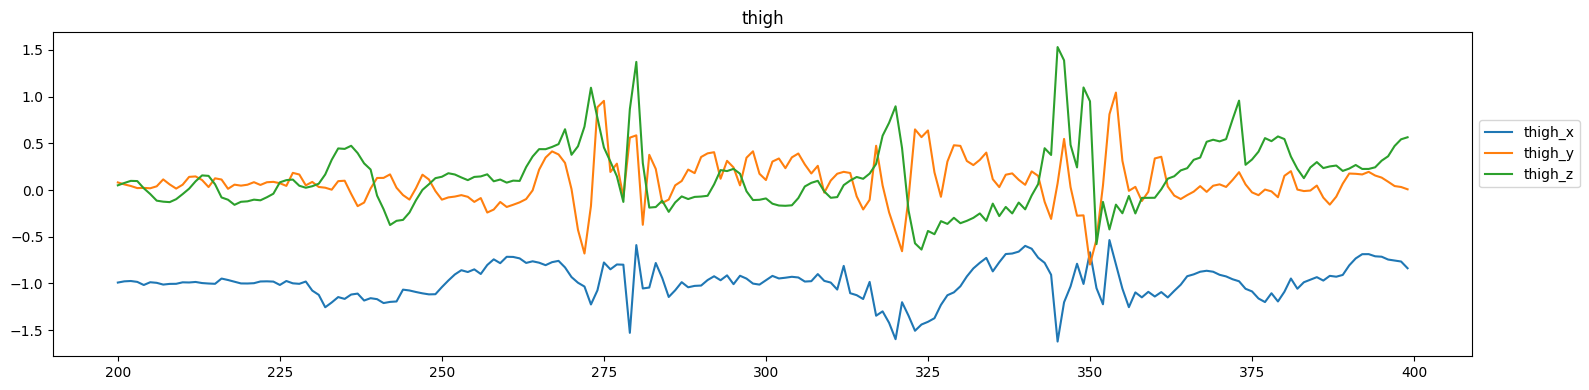

In [6]:
plot_activity(1,data,200)